In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = True
sns.set_style('darkgrid')

from typing import Literal
from keras import optimizers
from keras import losses
from keras import metrics

from src.models import CustomFFNN
from src.data_import import load_naive_dataset
from src.plots import plot_predictions, plot_loss

2024-11-13 19:58:03.283317: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 19:58:03.288477: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 19:58:03.301741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-13 19:58:03.325359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-13 19:58:03.331718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 19:58:03.346639: I tensorflow/core/platform/cpu_feature_gu

# Task 2.2 - Naive Model approach

## Load Dataset

In [2]:
train_data_path = os.path.abspath(os.path.join('calibration', 'biaxial.txt'))
train_features, train_labels = load_naive_dataset(train_data_path)

## Model Initialization and Training

In [3]:
naive_model = CustomFFNN(
    input_size=6, 
    hidden_sizes=[32, 32, 32, 9],
    activations=['softplus', 'softplus', 'softplus', 'linear']
)
naive_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.MeanSquaredError()
)
h = naive_model.fit(train_features, train_labels, batch_size=16, epochs=200, verbose=0)
loss = h.history['loss']
# val_loss = h.history['val_loss']

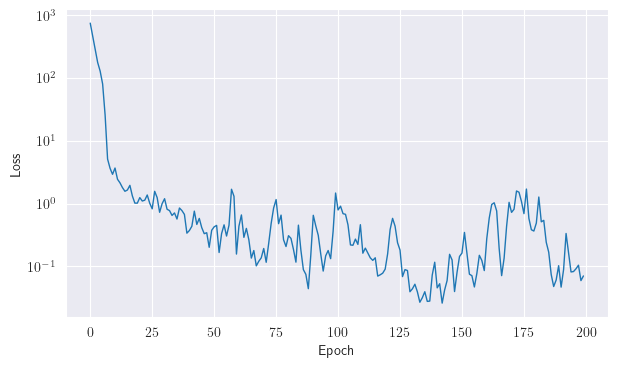

In [4]:
fig = plot_loss(loss)
plt.show()

## Model Evaluation

### -- on seen load case

In [5]:
train_predictions = naive_model.predict(train_features)

train_mets = [metrics.R2Score() for _ in range(train_labels.shape[1])]
for i in range(train_labels.shape[1]):  # Iterate over each of the 9 features/targets
    train_mets[i].update_state(tf.expand_dims(train_labels[:, i], -1), tf.expand_dims(train_predictions[:, i], -1))

# Now, get the R² score for each target (feature) separately
train_r2_scores = [metric.result().numpy() for metric in train_mets]

print("Train R² Scores for each feature:", train_r2_scores)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Train R² Scores for each feature: [0.9998507, 0.0, 0.0, 0.0, 0.99971336, 0.0, 0.0, 0.0, -12602350.0]


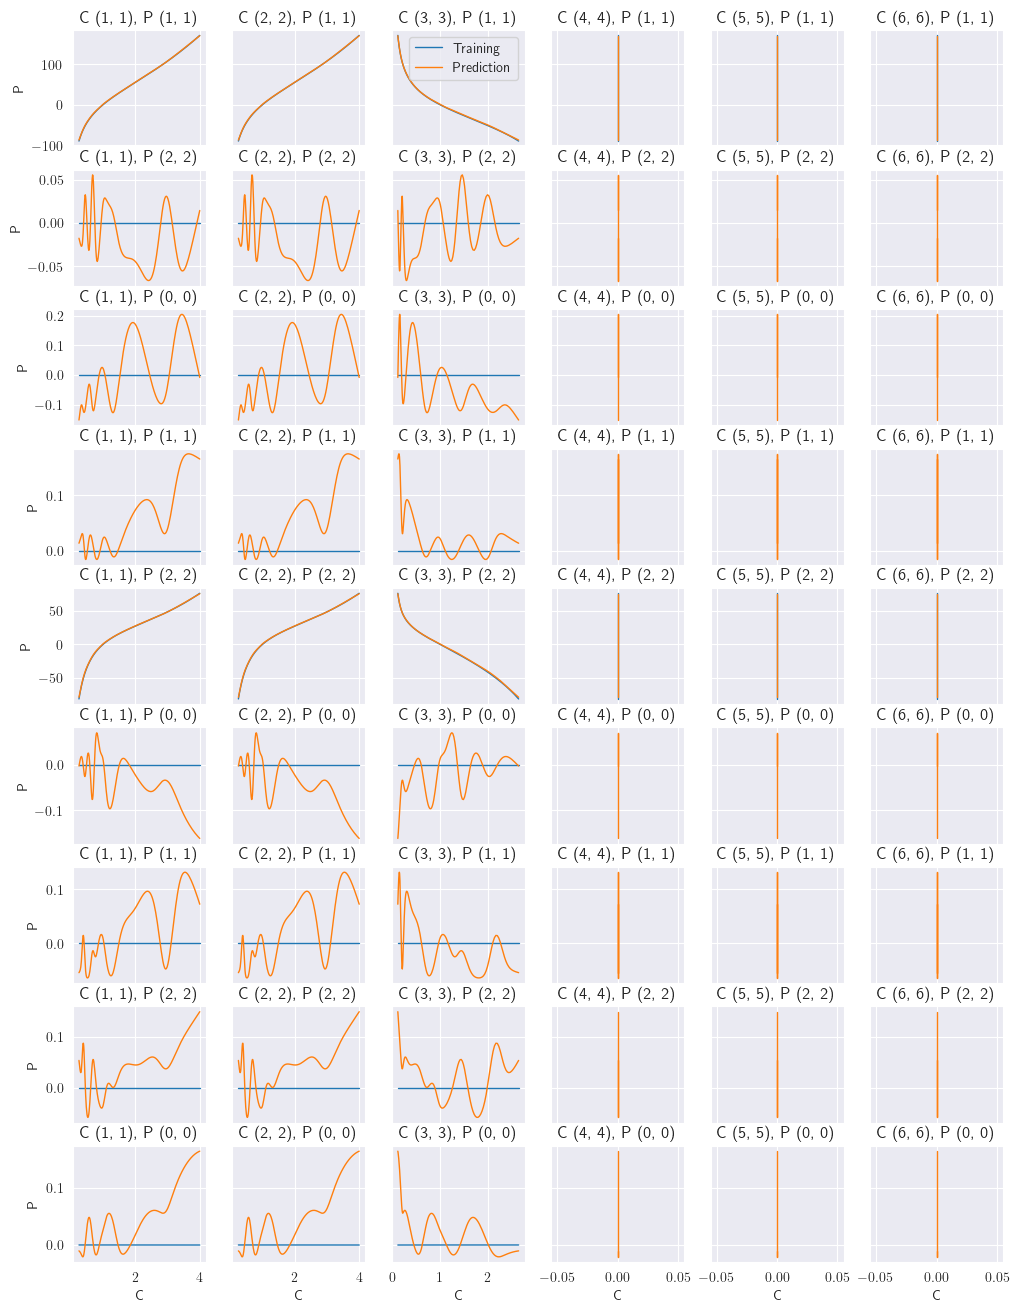

In [6]:
fig_train_pred = plot_predictions(train_features, train_labels, train_predictions)
plt.show()

### -> on unseen load case - uniaxial

In [14]:
test_data_path = os.path.abspath(os.path.join('calibration', 'uniaxial.txt'))
test_features, test_labels = load_naive_dataset(test_data_path)

test_predictions = naive_model.predict(test_features)

test_mets = [metrics.R2Score() for _ in range(test_labels.shape[1])]
for i in range(test_labels.shape[1]):  # Iterate over each of the 9 features/targets
    test_mets[i].update_state(tf.expand_dims(test_labels[:, i], -1), tf.expand_dims(test_predictions[:, i], -1))

# Now, get the R² score for each target (feature) separately
test_r2_scores = [metric.result().numpy() for metric in test_mets]

print("Test R² Scores for each feature:", test_r2_scores)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test R² Scores for each feature: [0.70759916, 0.0, 0.0, 0.0, -3681762400000.0, 0.0, 0.0, 0.0, -75604400.0]


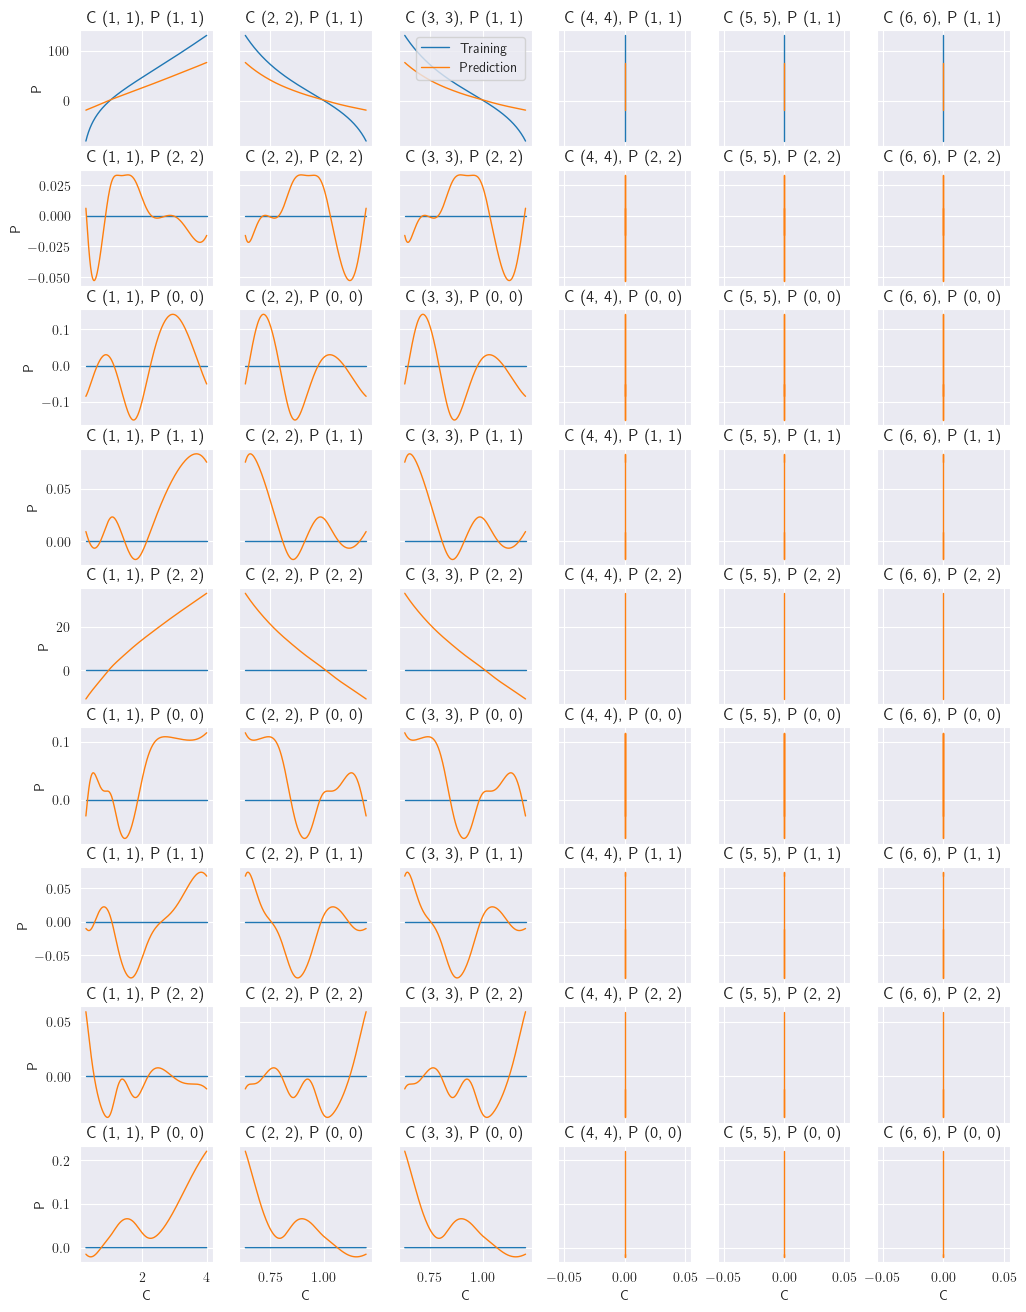

In [15]:
fig_test_pred = plot_predictions(test_features, test_labels, test_predictions)
plt.show()

### -> on unseen load case - pure_shear

In [16]:
test_data_path = os.path.abspath(os.path.join('calibration', 'pure_shear.txt'))
test_features, test_labels = load_naive_dataset(test_data_path)

test_predictions = naive_model.predict(test_features)

test_mets = [metrics.R2Score() for _ in range(test_labels.shape[1])]
for i in range(test_labels.shape[1]):  # Iterate over each of the 9 features/targets
    test_mets[i].update_state(tf.expand_dims(test_labels[:, i], -1), tf.expand_dims(test_predictions[:, i], -1))

# Now, get the R² score for each target (feature) separately
test_r2_scores = [metric.result().numpy() for metric in test_mets]

print("Test R² Scores for each feature:", test_r2_scores)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test R² Scores for each feature: [-5.8679485, -2.2800767, 0.0, -2.2620392, -3.5406957, 0.0, 0.0, 0.0, -1.8305316]


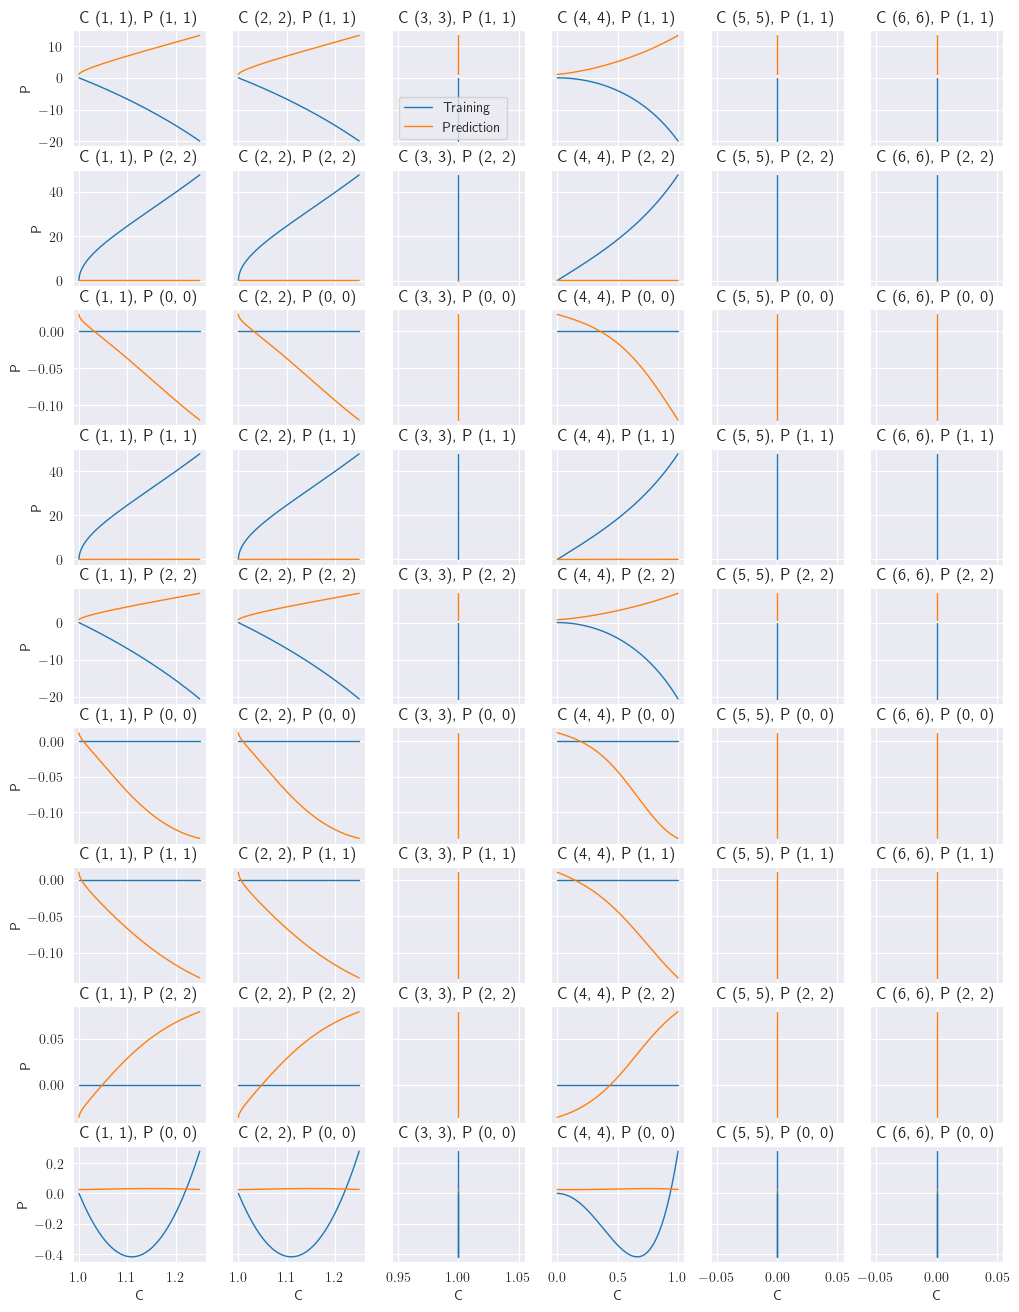

In [17]:
fig_test_pred = plot_predictions(test_features, test_labels, test_predictions)
plt.show()